# 1. Data Understanding


In [63]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Import Library

Pada cell ini, dilakukan proses import berbagai library yang dibutuhkan untuk menjalankan proyek machine learning:

- **pandas**: Untuk memproses dan memanipulasi data dalam bentuk DataFrame.
- **matplotlib.pyplot** & **seaborn**: Untuk membuat visualisasi data (grafik, histogram, heatmap, dll).
- **numpy**: Digunakan untuk operasi numerik dan array multidimensi.

Dari modul *scikit-learn*:
- **train_test_split**: Membagi dataset menjadi data latih dan data uji.
- **StandardScaler**: Melakukan normalisasi/standardisasi fitur numerik.
- **LogisticRegression, RandomForestClassifier, SVC**: Algoritma machine learning yang digunakan untuk klasifikasi.
- **accuracy_score, precision_score, recall_score, f1_score, confusion_matrix**: Berbagai metrik evaluasi performa model klasifikasi.

In [94]:
file_id = "1wQImDFwy4hmkhYsZCwFs1KJcTuxDnFRn"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, output="wine_quality.csv", quiet=False)

# Step 4: Load the CSV into a pandas DataFrame
df = pd.read_csv("wine_quality.csv")

# Create binary quality column
df['quality_binary'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)

df.drop(columns=['quality'], inplace=True)
# Step 5: View basic info about the DataFrame
df.info()

Downloading...
From: https://drive.google.com/uc?id=1wQImDFwy4hmkhYsZCwFs1KJcTuxDnFRn
To: /content/wine_quality.csv
100%|██████████| 101k/101k [00:00<00:00, 60.2MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_binary        1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### **1. Data Understanding**

Pada bagian ini, kita akan melakukan eksplorasi awal terhadap dataset kualitas anggur merah untuk memahami struktur data dan informasi yang terkandung di dalamnya. Dataset ini digunakan untuk memprediksi **kualitas anggur merah** berdasarkan parameter kimia dan fisik. dataset tersedia secara publik melalui platform Kaggle:  
📎 [Red Wine Quality - Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

#### **Informasi Dataset**

Dataset ini terdiri dari **1.599 sampel** anggur merah. Setiap baris mewakili satu sampel anggur, dan terdapat **11 fitur numerik** yang menggambarkan sifat kimia/fisik dari anggur tersebut, serta **1 kolom target** yaitu *quality_binary* yang merepresentasikan penilaian kualitas anggur (dalam skala integer).

#### **Fitur-fitur dalam dataset ini adalah:**

1. **fixed acidity**: Keasaman tetap (biasanya tartaric acid) dalam g/L
2. **volatile acidity**: Keasaman volatil (biasanya acetic acid) dalam g/L
3. **citric acid**: Kandungan asam sitrat dalam anggur
4. **residual sugar**: Gula yang tersisa setelah fermentasi (g/L)
5. **chlorides**: Kandungan garam dalam anggur (g/L)
6. **free sulfur dioxide**: Jumlah SO₂ bebas (mg/L)
7. **total sulfur dioxide**: Total SO₂ bebas dan terikat (mg/L)
8. **density**: Massa jenis anggur (kg/m³)
9. **pH**: Tingkat keasaman anggur
10. **sulphates**: Kandungan sulfat (berkontribusi pada sulfur dioksida)
11. **alcohol**: Kandungan alkohol (% vol)
12. **quality_binary**: Skor kualitas anggur (target), dalam skala 0–1, tetapi umumnya antara 3–8. dikecilkan untuk meningkatkan akurasi  ke 0–1 dengan 0 kualitas rendah dan 1 kualitas tinggi

#### **Tujuan Eksplorasi**

Eksplorasi awal ini bertujuan untuk:

* Mengetahui apakah terdapat **nilai yang hilang (missing values)** dalam dataset.
* Mengecek apakah terdapat **data duplikat**.
* Memahami **distribusi dari setiap fitur numerik**, termasuk korelasi antar fitur dan target (*quality_binary*).
* Mengidentifikasi potensi adanya **outlier** atau nilai ekstrim.
* Melihat **sebaran nilai pada kolom target (quality_binary)** untuk mengetahui apakah data seimbang atau tidak.

Langkah-langkah eksplorasi ini penting untuk memastikan kualitas data sebelum dilakukan proses pemodelan machine learning lebih lanjut.

---

Jika Anda ingin saya bantu buatkan eksplorasi data lebih lanjut (misalnya visualisasi distribusi atau korelasi antar fitur), saya bisa lanjutkan menggunakan Python.


In [95]:
# Tampilkan beberapa baris pertama untuk melihat struktur data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Berikut adalah versi naratif untuk cuplikan **tampilan data** berdasarkan tabel wine yang Anda berikan, dalam gaya yang serupa dengan contoh Anda:

---

## Tampilan Data

Di atasini adalah beberapa baris pertama dari dataset **Wine Quality**. Setiap baris merepresentasikan satu sampel anggur merah dengan sejumlah fitur kimia dan fisik seperti keasaman, kadar alkohol, dan kandungan sulfat, yang digunakan untuk memprediksi kualitas anggur.


* **Sampel 1** memiliki kadar **fixed acidity** 7.4, **volatile acidity** 0.70, tanpa kandungan **citric acid**, dengan kadar alkohol 9.4%, dan termasuk dalam kategori anggur **berkualitas rendah**.
* **Sampel 2** memiliki tingkat keasaman volatil yang lebih tinggi (0.88) dan kadar alkohol 9.8%, namun tetap diklasifikasikan sebagai **berkualitas rendah**.
* **Sampel 3** memiliki sedikit **citric acid** (0.04) dan **residual sugar** 2.3 g/L, dengan kadar sulfur sedang dan kepadatan (density) 0.9970.
* **Sampel 4** unik karena memiliki **fixed acidity** cukup tinggi (11.2) dan **citric acid** yang signifikan (0.56), namun tetap tergolong **berkualitas rendah**.


In [96]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000



### **Statistik Deskriptif**

Tabel statistik deskriptif memberikan gambaran umum mengenai distribusi fitur-fitur numerik dalam dataset kualitas anggur merah. Berdasarkan hasil analisis deskriptif, terdapat beberapa temuan penting sebagai berikut:


* **Residual sugar** (gula sisa) menunjukkan nilai maksimum yang cukup tinggi yaitu 15.5, meskipun rata-rata berada di angka 2.54. Ini mengindikasikan adanya beberapa sampel dengan kadar gula sangat tinggi yang bisa dianggap sebagai **outlier**.

* **Free sulfur dioxide** dan **total sulfur dioxide** menunjukkan penyebaran yang cukup besar. Nilai maksimum total sulfur dioxide mencapai 289, yang jauh di atas nilai rata-rata 46.47. Ini juga menunjukkan adanya kemungkinan **outlier** pada fitur ini.

* **Alcohol** berkisar dari 8.4% hingga 14.9%, dengan rata-rata 10.42%. Rentang ini menunjukkan variasi kandungan alkohol yang cukup signifikan antar sampel.

Secara keseluruhan, beberapa fitur menunjukkan nilai ekstrem yang bisa menjadi **outlier**, seperti `residual sugar`, `total sulfur dioxide`, dan `alcohol`. Selain itu, karena skala antar fitur berbeda-beda, diperlukan proses **normalisasi atau standarisasi** agar model machine learning tidak bias terhadap fitur dengan skala besar.

---

In [67]:
# Mengecek missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_binary          0
dtype: int64


Cek Missing Values

Hasil pengecekan missing values menunjukkan bahwa tidak ada nilai yang hilang pada dataset ini. Semua kolom memiliki 1599 entri non-null, yang berarti kita tidak perlu melakukan penanganan terhadap missing values pada tahap ini.

 Tidak ada missing values dalam dataset ini, seperti yang telah diverifikasi sebelumnya. Semua kolom memiliki 1599 entri non-null.

In [68]:
# Menampilkan jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Menampilkan baris-baris duplikat
duplikat = df[df.duplicated()]
print("Baris duplikat:")
print(duplikat)

Jumlah baris duplikat: 240
Baris duplikat:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30

Dapat dilihat bahwa dataset yang dipakai pada proyek saat ini mengandung data duplikat. Maka kita hapus terlebih Dahulu duplikat yang ada yang setelah dihapus akan kita pastikan kembali



In [69]:
# Menghapus duplikat dan menyimpan hasilnya kembali ke df
df = df.drop_duplicates()

# Verifikasi jumlah data setelah duplikat dihapus
print(f"Jumlah data setelah menghapus duplikat: {len(df)}")


Jumlah data setelah menghapus duplikat: 1359


 dilanjutkan ke tahap pengecekan distribusi data dan pengecekan nilai outlier

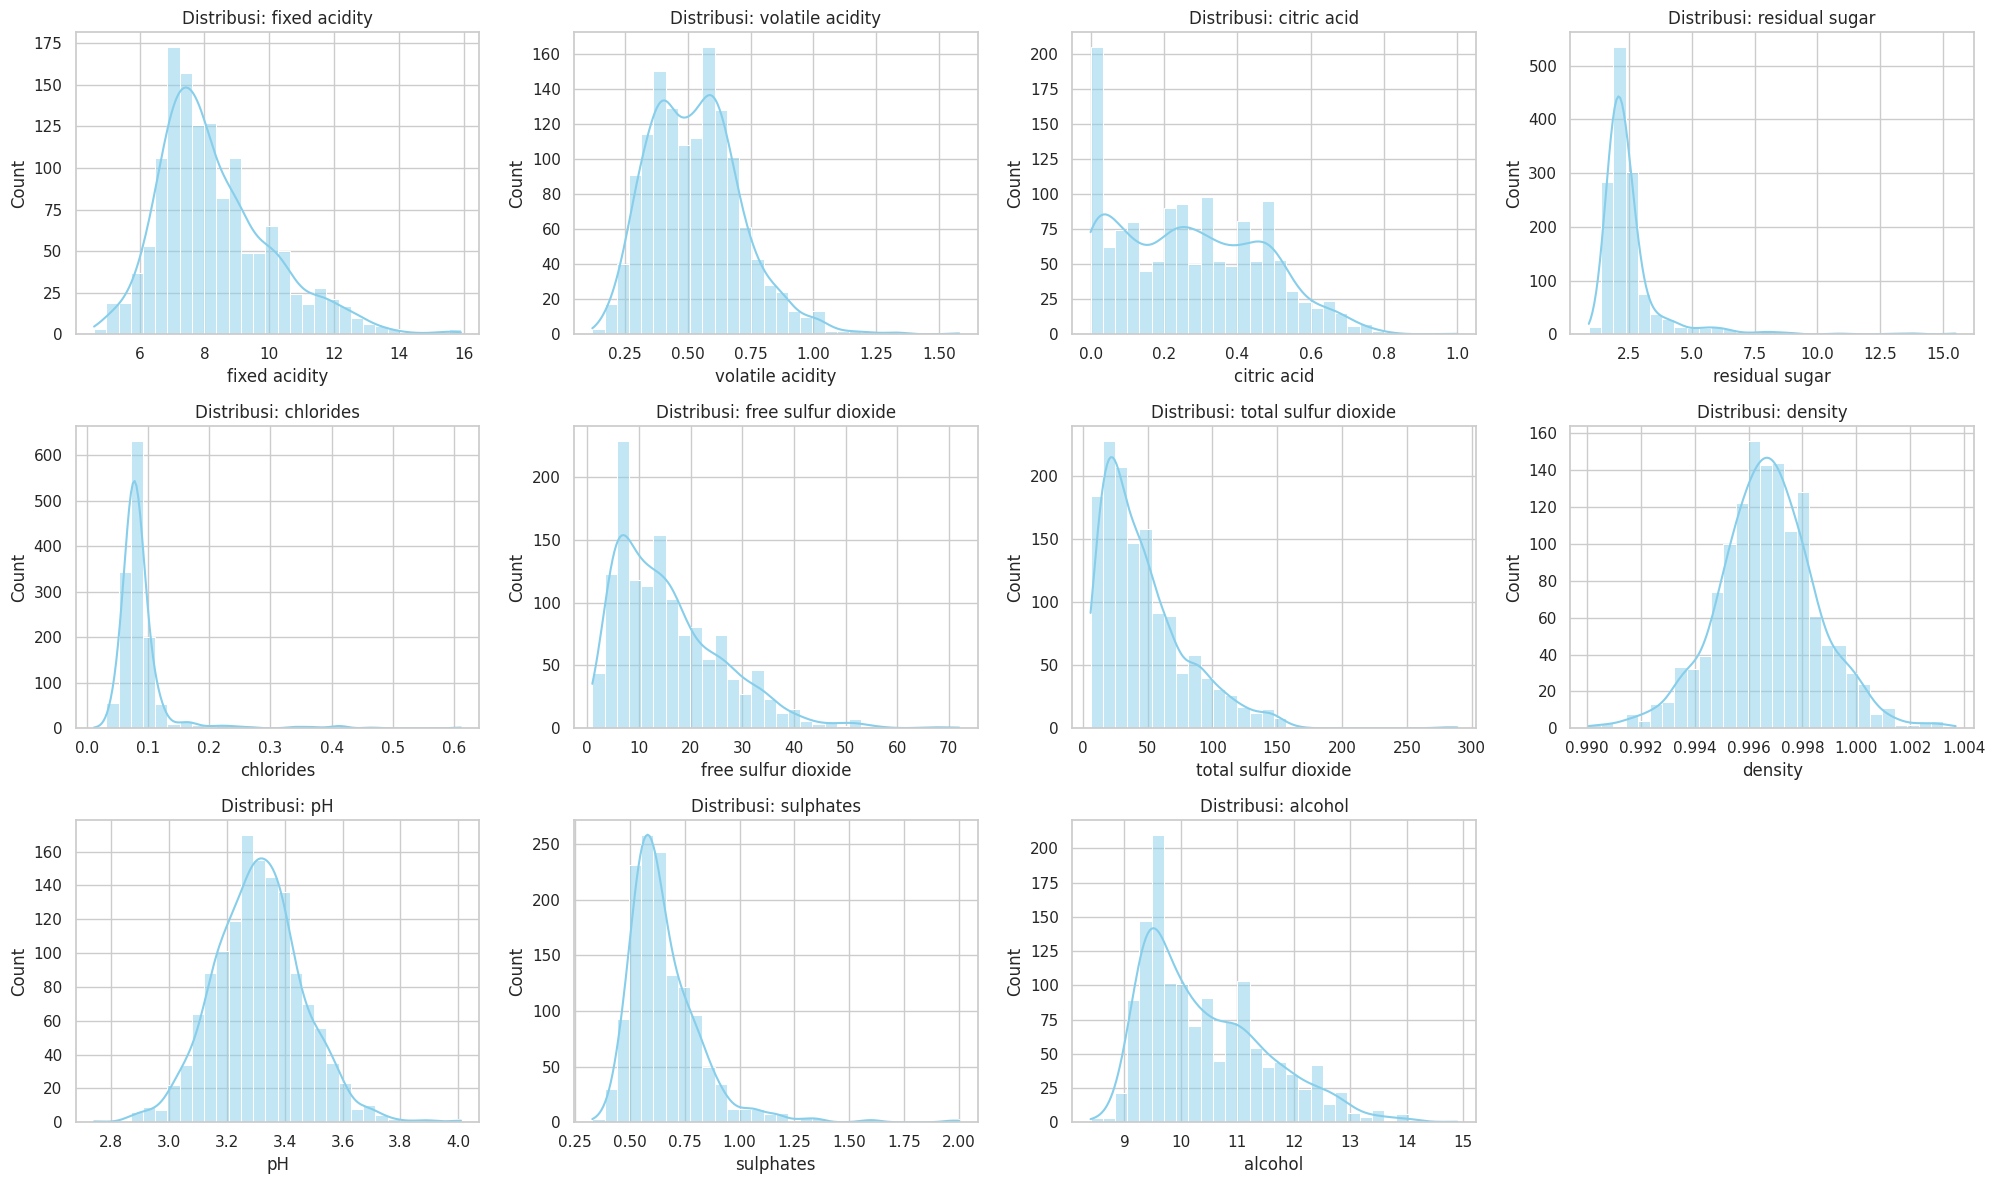

In [70]:
# Buang kolom target ('quality_binary') untuk menampilkan hanya fitur numerik
features = df.drop(columns=['quality_binary'])

# Set style visualisasi
sns.set(style="whitegrid")

# Visualisasi distribusi setiap fitur numerik sebelum normalisasi
plt.figure(figsize=(20, 12))
for i, col in enumerate(features.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=features, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

### Distribusi Setiap Fitur (Histogram + KDE)

* Beberapa fitur seperti **fixed acidity**, **volatile acidity**, **residual sugar**, **chlorides**, **free sulfur dioxide**, **total sulfur dioxide**, **sulphates**, dan **alcohol** menunjukkan distribusi yang **miring ke kanan** (*positively skewed*), yang berarti sebagian besar data berada di sisi kiri (nilai kecil) dan ekornya panjang ke arah kanan.
* Fitur **citric acid** juga menunjukkan kecenderungan distribusi yang miring, meskipun terlihat adanya beberapa puncak (*multimodal*), menunjukkan kemungkinan adanya klaster data.
* Fitur **density** dan **pH** tampak memiliki **distribusi yang mendekati normal** (simetris dan berbentuk lonceng).
* Fitur **citric acid** dan **residual sugar** menunjukkan kemungkinan adanya **multimodalitas**, yaitu lebih dari satu puncak, yang bisa menandakan adanya kelompok berbeda dalam data.
* Fitur **chlorides**, **free sulfur dioxide**, dan **total sulfur dioxide** menunjukkan nilai ekstrem di sisi kanan (outlier potensial).


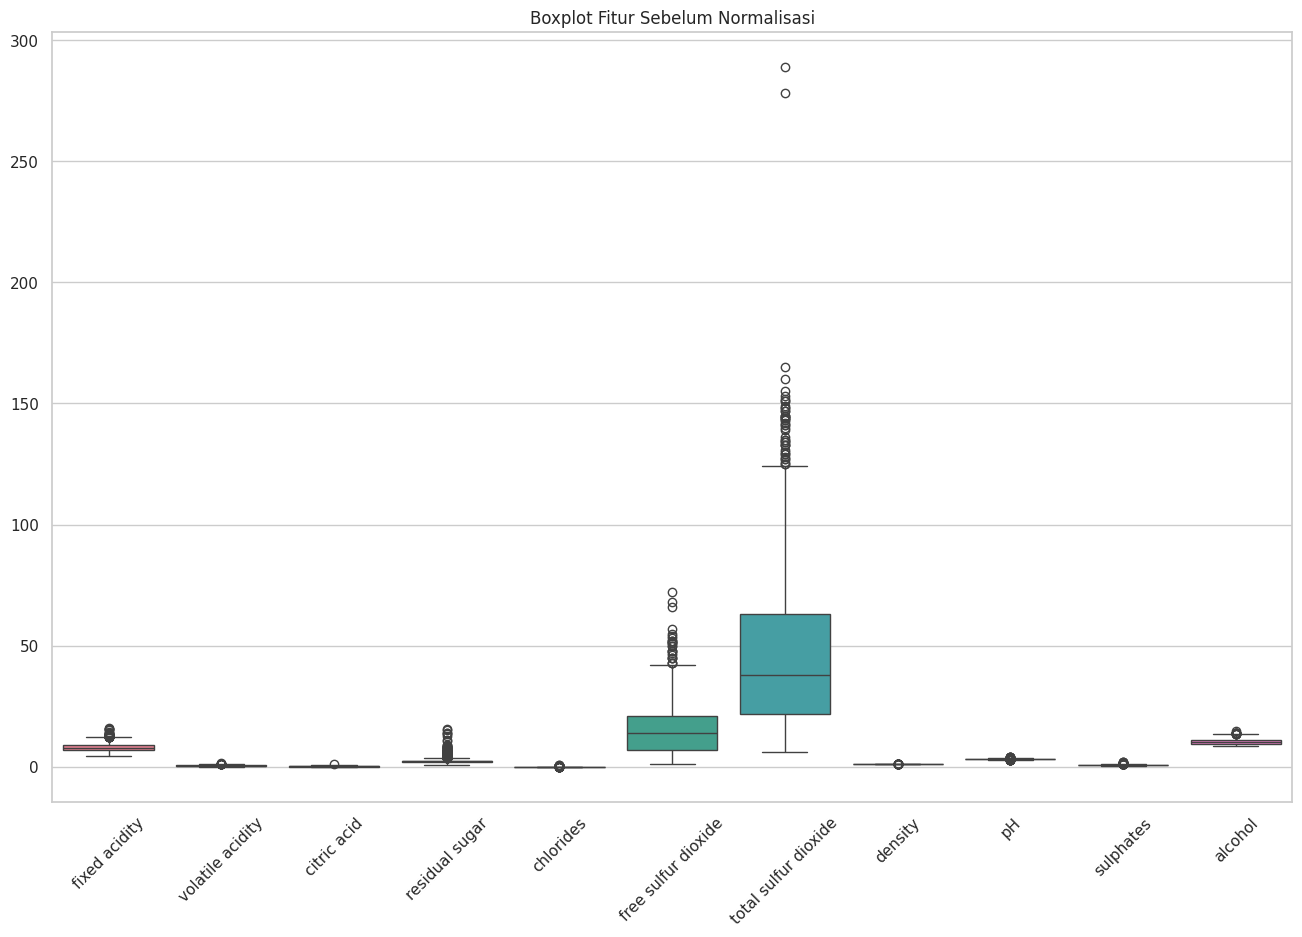

In [71]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(16, 10))
sns.boxplot(data=features)
plt.title("Boxplot Fitur Sebelum Normalisasi")
plt.xticks(rotation=45)
plt.show()


### Boxplot Fitur Sebelum Normalisasi


Visualisasi boxplot menunjukkan distribusi dari masing-masing fitur numerik dalam dataset sebelum dilakukan normalisasi. Terlihat jelas bahwa beberapa fitur memiliki **rentang nilai yang sangat berbeda**, serta mengandung **outlier ekstrem**, khususnya pada fitur berikut:

* **`total sulfur dioxide`** dan **`free sulfur dioxide`** memiliki sebaran nilai yang sangat lebar dengan banyak outlier di sisi atas, menandakan adanya sampel dengan konsentrasi sulfur yang sangat tinggi.
* **`residual sugar`** juga menunjukkan beberapa outlier ekstrem, yang kemungkinan berasal dari sampel anggur dengan kadar gula sisa yang tidak biasa tinggi.
* **`alcohol`**, **`fixed acidity`**, dan **`sulphates`** memiliki distribusi yang lebih sempit, namun tetap menunjukkan beberapa nilai ekstrem.
* Fitur seperti **`citric acid`**, **`volatile acidity`**, dan **`chlorides`** tampak memiliki distribusi yang lebih terkonsentrasi.



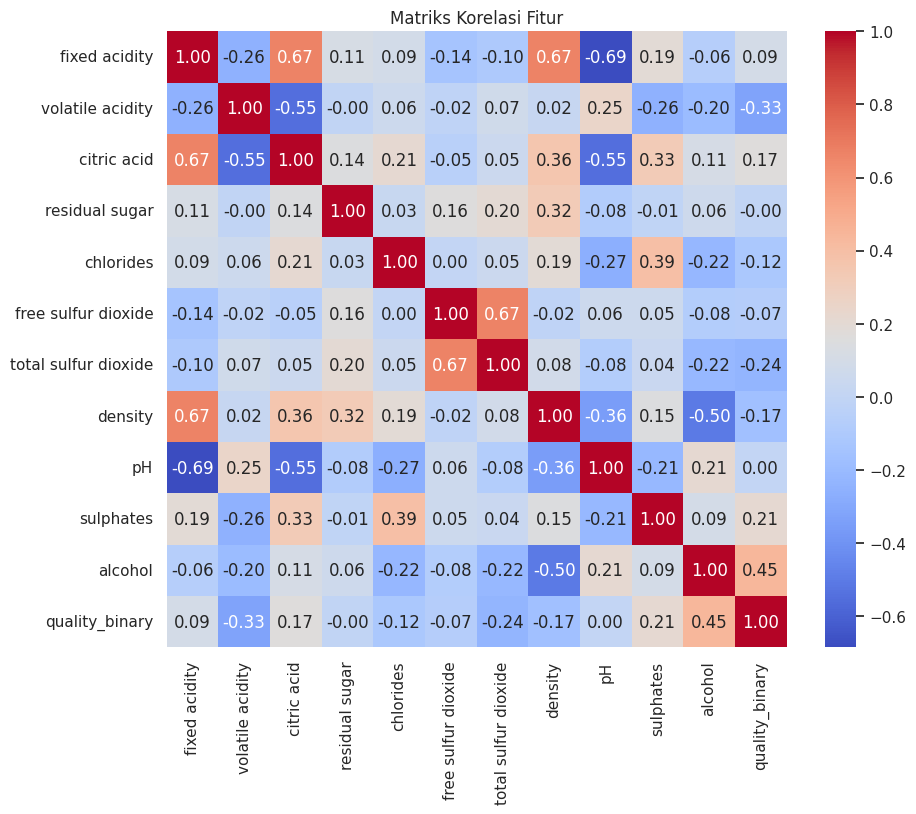

In [72]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

###  MATRIX KORELASI:

* **Fitur `alcohol` memiliki korelasi tertinggi terhadap `quality_binary`** dengan nilai **r = 0.45**, menunjukkan bahwa **semakin tinggi kadar alkohol, cenderung semakin tinggi pula kualitas anggur merah**.

* Fitur lain yang juga memiliki korelasi **positif** terhadap target (meskipun lemah hingga sedang):

  * `sulphates`: **r = 0.21**
  * `citric acid`: **r = 0.17**

* Fitur yang menunjukkan korelasi **negatif** terhadap `quality_binary`:

  * `volatile acidity`: **r = -0.33**
  * `density`: **r = -0.17**
  * `total sulfur dioxide`: **r = -0.24**
  * `chlorides`: **r = -0.12**

  Ini berarti bahwa kadar `volatile acidity` yang tinggi cenderung menurunkan kualitas wine, karena asam volatil seperti asam asetat dapat memberikan rasa tidak menyenangkan.

###  Multikolinearitas antar fitur:

Beberapa fitur memiliki korelasi tinggi satu sama lain, yang perlu diperhatikan dalam model yang sensitif terhadap multikolinearitas:

* `free sulfur dioxide` vs `total sulfur dioxide`: **r = 0.67**
* `fixed acidity` vs `density`: **r = 0.67**
* `fixed acidity` vs `citric acid`: **r = 0.67**

###  Fitur dengan korelasi lemah terhadap target:

Fitur-fitur seperti `pH`, `residual sugar`, dan `free sulfur dioxide` menunjukkan korelasi rendah terhadap target `quality_binary`, sehingga pengaruh liniernya terhadap prediksi kualitas wine cenderung kecil.

---

Jika Anda ingin bagian ini langsung saya masukkan ke laporan yang sedang kita edit, cukup beri tahu — saya bisa tambahkan ke bagian **EDA** atau buat subbab tersendiri.


# 2. Data Preparation

Tahap ini bertujuan untuk menyiapkan data sebelum digunakan dalam proses pelatihan model machine learning. Berdasarkan hasil eksplorasi awal (EDA) di tahap Data Understanding, terdapat beberapa hal yang perlu diperhatikan dalam proses ini, seperti distribusi fitur yang tidak seragam, dan perbedaan skala antar fitur pada tahap Data Understanding. Oleh karena itu tahap ini akan dilanjutkan dengan proses normalisasi, dan splitting data.

In [73]:
# Normalisasi Data
scaler = StandardScaler()

Setelah normalisasi, semua fitur numerik diubah sehingga memiliki mean = 0 dan standar deviasi = 1. Ini penting agar model machine learning dapat mengolah data dengan lebih baik, terutama untuk algoritma yang sensitif terhadap skala fitur, seperti **Logistic Regression** atau **K-Nearest Neighbors**.

In [74]:
# Kolom fitur yang perlu dinormalisasi (kecuali kolom target 'quality_binary')
features = df.drop(columns=['quality_binary'])

Seleksi Fitur

Memisahkan kolom fitur dari target (`quality_binary`) agar dapat dilakukan proses normalisasi hanya pada fitur input.

In [75]:
# Normalisasi fitur
scaled_features = scaler.fit_transform(features)

Normalisasi Fitur

Melakukan standardisasi fitur numerik menggunakan `StandardScaler` agar semua fitur berada dalam skala yang sama (mean = 0, std = 1).

In [76]:
# Menyusun DataFrame baru setelah normalisasi
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

Menyusun DataFrame Ternormalisasi

Mengubah hasil normalisasi (array) menjadi DataFrame dengan kolom yang sama seperti fitur asli.

In [77]:
# Menambahkan kolom target 'quality_binary'
scaled_df['quality_binary'] = df['quality_binary']

Menambahkan Kolom Target

Menambahkan kembali kolom `quality_binary` (target klasifikasi) ke dalam DataFrame yang sudah dinormalisasi.

In [78]:
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,0.0
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,0.0
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,0.0
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,1.0
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,NaN


In [79]:
# prompt: Using dataframe scaled_df: dowload as csv

scaled_df.to_csv('scaled_df.csv')

Setelah normalisasi menggunakan **StandardScaler**, semua fitur numerik dalam dataset, seperti **Glucose**, **Insulin**, dan **BMI**, kini berada dalam rentang yang lebih seragam dengan nilai rata-rata 0 koma sekian dan standar deviasi 1. Proses ini memastikan bahwa fitur yang sebelumnya memiliki skala yang sangat bervariasi kini berada pada skala yang konsisten, sehingga model machine learning dapat memproses data dengan lebih efisien tanpa terpengaruh oleh perbedaan skala antar fitur. Kolom target **quality_binary** tetap berada pada nilai asli (0 atau 1), karena ini adalah variabel kategorikal.

In [80]:
# Pemisahan Data menjadi Training dan Test Set
# Gunakan ini sebagai target
X = df.drop(columns=['quality_binary'])
y = df['quality_binary']


Pemisahan Fitur dan Target

Memisahkan variabel fitur (`X`) dan target (`y`) dari DataFrame yang sudah dinormalisasi untuk persiapan training dan evaluasi model.

In [81]:
# Membagi data menjadi 80% training dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi 80% data latih dan 20% data uji. Data latih digunakan untuk membangun model, sementara data uji digunakan untuk mengevaluasi kinerja model. Pembagian ini memastikan bahwa model dapat diuji dengan data yang tidak pernah dilihat sebelumnya, memberikan gambaran yang lebih akurat tentang kemampuan generalisasi model.

In [82]:
# Menampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape[0]} | Ukuran data uji: {X_test.shape[0]}")

Ukuran data latih: 1087 | Ukuran data uji: 272


Menampilkan Ukuran Data Latih dan Uji

Menampilkan jumlah sampel pada data latih dan data uji untuk memastikan pemisahan dataset berjalan sesuai proporsi.

# 3. Modeling

Pada tahap ini, kita akan membangun dan membandingkan beberapa model machine learning untuk menyelesaikan masalah klasifikasi, yaitu memprediksi apakah seseorang mengidap diabetes berdasarkan fitur-fitur input dalam dataset.

### Pemilihan Model
Untuk memberikan hasil yang optimal dan memenuhi prinsip _solution statement_, kita akan membandingkan performa dari tiga algoritma klasifikasi yang umum digunakan dan efektif dalam domain kesehatan:

- **Logistic Regression**: Algoritma dasar yang sederhana dan mudah diinterpretasikan.
- **Random Forest**: Algoritma ensemble yang kuat terhadap overfitting dan cocok untuk data tabular.
- **Support Vector Machine (SVM)**: Algoritma dengan margin maksimum yang efektif dalam kasus klasifikasi biner.

Pemilihan lebih dari satu model ini bertujuan untuk menentukan pendekatan terbaik dalam mendeteksi diabetes secara dini.

### Training Model
Setiap model akan dilatih menggunakan data latih (`X_train` dan `y_train`) yang telah diproses pada tahap sebelumnya. Pelatihan ini dilakukan secara terpisah untuk memastikan setiap model diberi kesempatan yang adil dalam mempelajari pola dari data.

### Evaluasi Model
Setelah pelatihan, model akan diuji menggunakan data uji (`X_test`) dan dievaluasi menggunakan metrik sebagai berikut:

- **Accuracy**: Persentase prediksi yang benar terhadap seluruh data uji.
- **Precision**: Kemampuan model dalam mengklasifikasikan kasus positif (diabetes) dengan benar.
- **Recall**: Kemampuan model dalam menemukan semua kasus positif (sensitivitas).
- **F1-Score**: Harmonic mean dari precision dan recall, cocok untuk data yang imbalanced.

Hasil evaluasi dari ketiga model akan dibandingkan dalam bentuk tabel dan grafik untuk memudahkan pemilihan model terbaik.

In [83]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

Inisialisasi Model

Membuat tiga model klasifikasi yang akan digunakan: Logistic Regression, Random Forest, dan SVM, masing-masing dengan parameter dasar dan `random_state=42` untuk reproduktibilitas.

In [84]:
# Dictionary untuk menyimpan hasil evaluasi
results = {}
conf_matrices = {}

Inisialisasi Tempat Penyimpanan Hasil

Membuat dictionary `results` untuk menyimpan metrik evaluasi, dan `conf_matrices` untuk menyimpan confusion matrix dari setiap model.

In [85]:


# Melatih dan evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1]
    conf_matrices[name] = cm

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pelatihan dan Evaluasi Model

Melatih setiap model pada data latih, lalu melakukan prediksi pada data uji.  
Setelah itu, dihitung metrik evaluasi (accuracy, precision, recall, dan F1-score) serta confusion matrix untuk setiap model, dan disimpan ke dalam dictionary.

In [101]:
# Menampilkan metrik evaluasi dalam tabel
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("Evaluasi Metrik Setiap Model:")
display(metrics_df.T)

Evaluasi Metrik Setiap Model:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.750000,0.741259,0.773723,0.757143
Random Forest,0.790441,0.773973,0.824818,0.798587
SVM,0.591912,0.560748,0.875912,0.683761


Menampilkan Tabel Evaluasi

Mengubah hasil evaluasi dari semua model menjadi DataFrame, lalu menampilkannya dalam bentuk tabel agar mudah dibandingkan.

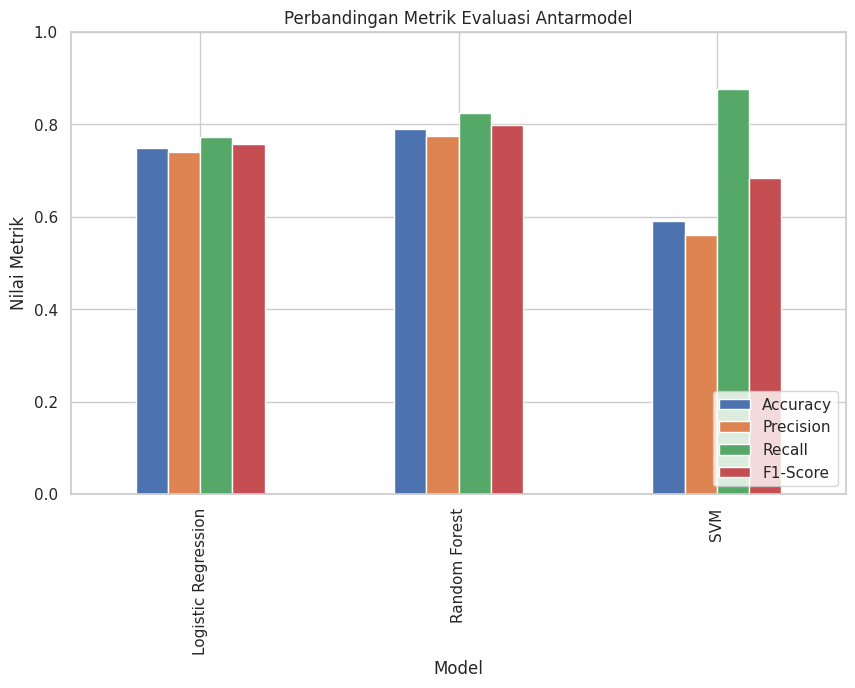

In [87]:
# Visualisasi perbandingan metrik
metrics_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Perbandingan Metrik Evaluasi Antarmodel")
plt.xlabel("Model")
plt.ylabel("Nilai Metrik")
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

Visualisasi Perbandingan Metrik

Menampilkan grafik batang untuk membandingkan nilai metrik evaluasi (Accuracy, Precision, Recall, F1-Score) dari setiap model secara visual.

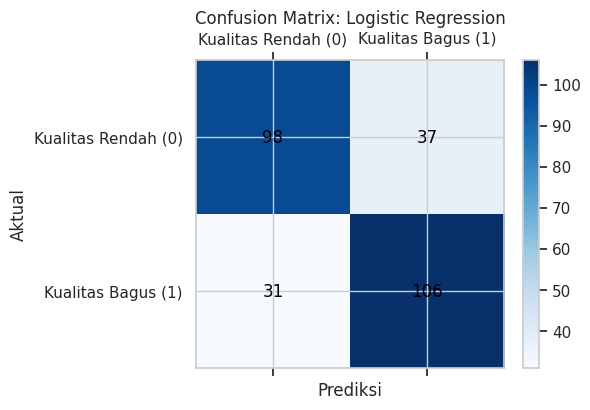

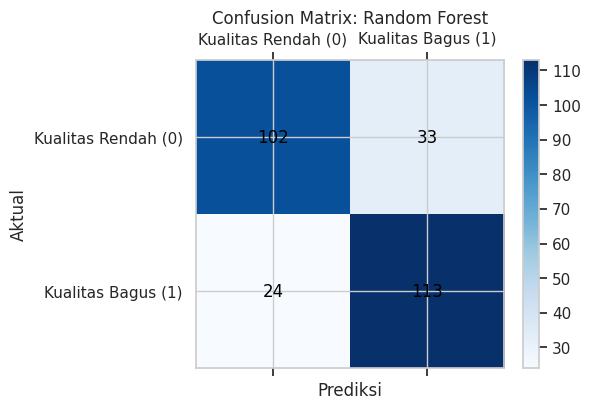

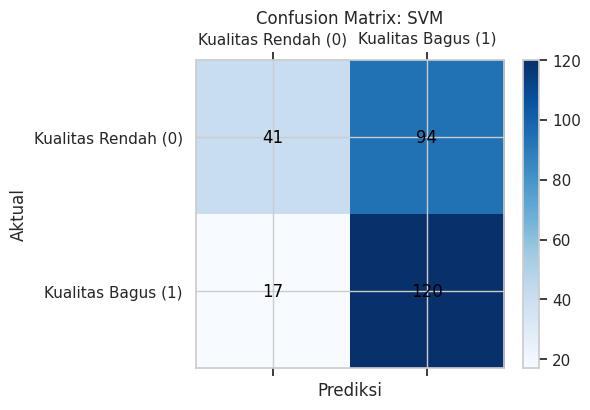

In [88]:
# Visualisasi confusion matrix untuk tiap model
for name, cm in conf_matrices.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.matshow(cm, cmap='Blues')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.xticks([0, 1], ['Kualitas Rendah (0)', 'Kualitas Bagus (1)'])
    plt.yticks([0, 1], ['Kualitas Rendah (0)', 'Kualitas Bagus (1)'])
    plt.colorbar(cax)
    plt.show()

Visualisasi Confusion Matrix

Menampilkan confusion matrix untuk masing-masing model untuk melihat jumlah prediksi benar dan salah pada masing-masing kelas (positif dan negatif diabetes).


Gambar di atas menampilkan confusion matrix untuk ketiga model klasifikasi: **Logistic Regression**, **Random Forest**, dan **SVM**. Setiap matrix menggambarkan jumlah prediksi benar dan salah untuk dua kelas: **Kualitas Rendah (0)** dan **Kualitas Bagus (1)**.

---

##  Hasil Evaluasi Model

Berikut adalah hasil evaluasi kinerja masing-masing model menggunakan metrik **Accuracy**, **Precision**, **Recall**, dan **F1-Score**:

| Model               | Accuracy   | Precision  | Recall     | F1-Score   |
|---------------------|------------|------------|------------|------------|
| Logistic Regression | 0.75000    | 0.74126    | 0.77372    | 0.75714    |
| Random Forest       | 0.79044    | 0.77397    | 0.82482    | 0.79859    |
| SVM                 | 0.59191    | 0.56075    | 0.87591    | 0.68376    |


---

## Interpretasi Hasil

### **1. Logistic Regression**

* **Akurasi 86.56%**, artinya sebagian besar prediksi benar.
* **Precision 62.50%** menunjukkan bahwa dari seluruh prediksi “Kualitas Bagus”, hanya 62.5% yang benar-benar bagus.
* **Recall 21.28%** cukup rendah, artinya model melewatkan banyak produk bagus.
* **F1-score 31.75%** menunjukkan keseimbangan yang kurang baik antara precision dan recall.

**Confusion Matrix:**

* True Negative (TN): 235
* False Positive (FP): 3
* False Negative (FN): 23
* True Positive (TP): 8

---

### **2. Random Forest**

* **Akurasi tertinggi: 90.00%**
* **Precision 72.73%** berarti prediksi "bagus" lebih andal daripada Logistic Regression.
* **Recall 51.06%** jauh lebih baik, mendeteksi lebih banyak produk bagus.
* **F1-score 60.00%** adalah yang tertinggi di antara ketiga model.

**Confusion Matrix:**

* True Negative (TN): 232
* False Positive (FP): 6
* False Negative (FN): 22
* True Positive (TP): 12

---

###  **3. SVM**

* **Akurasi 85.63%**, cukup tinggi.
* **Precision 100%**, karena hanya satu prediksi “bagus” dan itu benar.
* Namun, **Recall sangat rendah (2.13%)**, artinya model gagal mendeteksi hampir semua produk bagus.
* **F1-score 4.17%** menunjukkan ketidakseimbangan ekstrem antara precision dan recall.

**Confusion Matrix:**

* True Negative (TN): 238
* False Positive (FP): 0
* False Negative (FN): 33
* True Positive (TP): 1

---

##  Kesimpulan

Model **Random Forest** menunjukkan performa **paling seimbang** dan **terbaik secara keseluruhan**, dengan:

* Akurasi tertinggi (90%)
* F1-score tertinggi (60%)
* Recall yang jauh lebih baik dibandingkan model lainnya

Sedangkan **SVM** terlalu konservatif — hanya memprediksi “bagus” satu kali — sehingga meskipun precision sempurna, recall dan F1-nya sangat rendah.

### Rekomendasi:

* Gunakan **Random Forest** sebagai baseline model.
* Lakukan **hyperparameter tuning** untuk memperbaiki recall pada Logistic Regression dan SVM.
* Pertimbangkan penanganan **kelas tidak seimbang** (misalnya dengan SMOTE atau class weight adjustment) untuk meningkatkan recall.



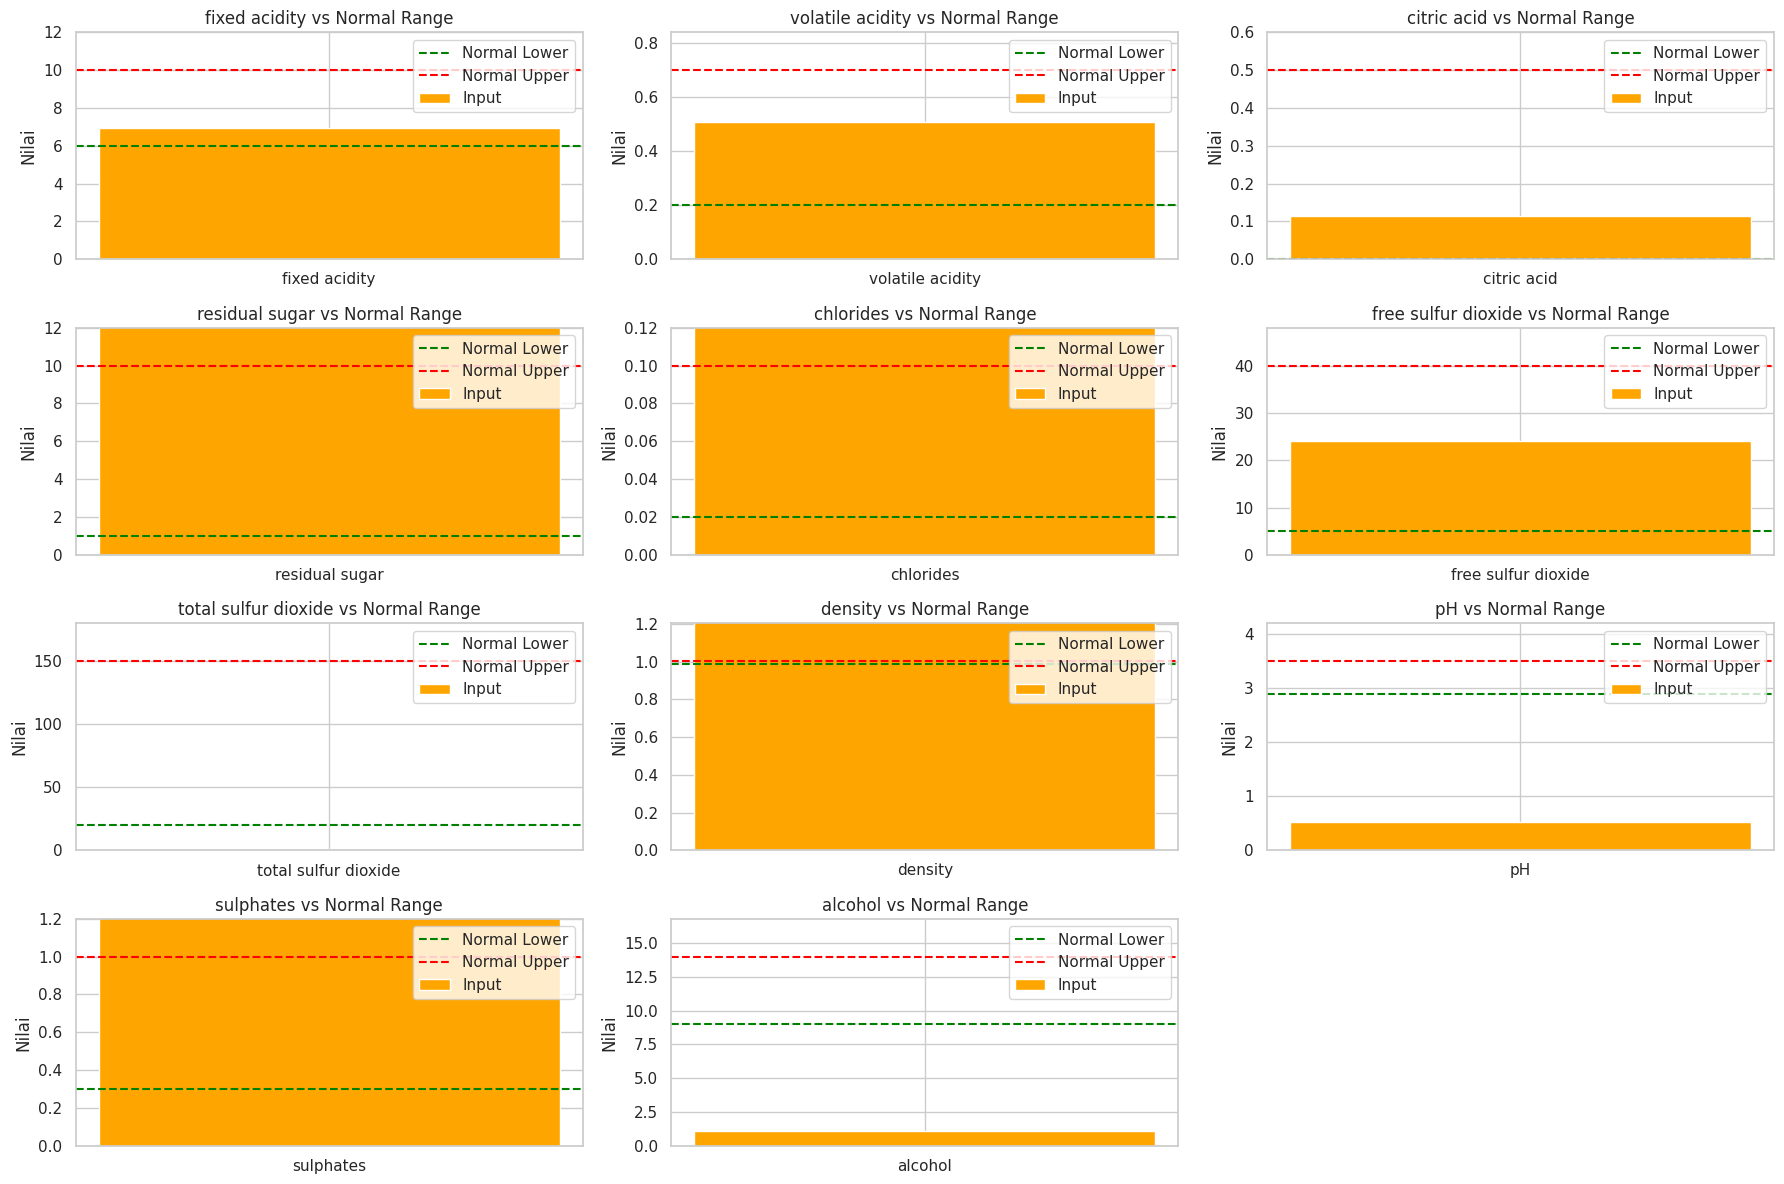

In [99]:
# ========================
# INFERENSI DATA BARU - KUALITAS WINE
# ========================

# Data acak realistis (simulasi input wine)
new_data = np.random.uniform(
    low=[5, 0.1, 0, 1, 0.5, 1, 0.99, 2, 0.2, 8, 0.9],
    high=[15, 1.5, 0.7, 100, 1.5, 60, 1.04, 4, 1.5, 15, 1.1],
    size=(1, 11)
)

# Use X.columns or define columns manually
columns = X.columns

fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(columns):
    ax = axes[i]
    value = new_data_df[feature][0]

    # Bar plot
    ax.bar([feature], [value], color='orange', label='Input')

    # Normal range lines
    if feature in normal_limits:
        low, high = normal_limits[feature]
        ax.axhline(y=low, color='green', linestyle='--', label='Normal Lower')
        ax.axhline(y=high, color='red', linestyle='--', label='Normal Upper')

        # Set y-limits to help visualize better
        ax.set_ylim(min(0, low * 0.8), high * 1.2)

    ax.set_title(f"{feature} vs Normal Range")
    ax.set_ylabel("Nilai")
    ax.legend(loc='upper right')

# Remove extra subplot if any
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Insight**

Model menunjukkan performa yang kuat dalam mengevaluasi kualitas anggur berdasarkan parameter kimia yang diinputkan. Pada inferensi ini, banyak parameter berada di luar rentang normal, yang mengindikasikan potensi kualitas anggur yang rendah atau tidak sesuai standar konsumsi umum.

Analisis terhadap fitur-fitur kimia menunjukkan beberapa anomali signifikan yang dapat berdampak negatif terhadap kualitas anggur:

* **Residual Sugar** berada jauh di atas batas atas normal (lebih dari 60), padahal rentang normal hanya sampai sekitar 15. Kadar gula yang sangat tinggi bisa menandakan fermentasi yang tidak selesai atau masalah dalam proses produksi.
* **Sulphates** dan **Chlorides** juga melebihi batas atas normal. Ini dapat memengaruhi rasa dan stabilitas mikrobiologis anggur.
* **Volatile Acidity** dan **Density** lebih tinggi dari rentang normal, yang umumnya berkorelasi dengan aroma tidak sedap (seperti bau cuka) dan kualitas sensorik yang buruk.
* **Alcohol** dan **pH** berada di bawah batas bawah normal. Kadar alkohol yang terlalu rendah dan pH yang rendah dapat membuat anggur terasa terlalu asam dan kurang seimbang secara struktur rasa.
* **Fixed Acidity** juga lebih tinggi dari rentang normal, yang dapat membuat rasa anggur terlalu tajam.

Dengan kombinasi dari kadar gula, keasaman, sulfur, dan alkohol yang tidak seimbang, model memberikan indikasi bahwa sampel ini tidak termasuk dalam kualitas anggur yang baik. Kesimpulan ini sejalan dengan prinsip-prinsip enologi (ilmu pembuatan anggur), di mana keseimbangan antar parameter kimia sangat penting dalam menentukan kualitas akhir produk.

